## 回顾
**检查参与 S1、S2 的被试的 MPM 在 aseg 分割下试次间的：**
### 变异系数

array([<Axes: title={'center': 'Cerebral-Cortex'}, xlabel='[Param]'>,
       <Axes: title={'center': 'Cerebral-White-Matter'}, xlabel='[Param]'>],
      dtype=object)

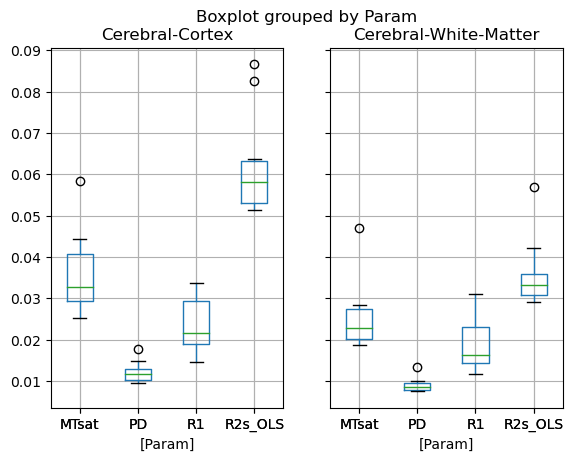

In [6]:
MPM_COV_aseg.drop('Sub', axis=1).boxplot(by=['Param'])

### 相关系数

array([<Axes: title={'center': 'Cerebral-Cortex'}, xlabel='[Param]'>,
       <Axes: title={'center': 'Cerebral-White-Matter'}, xlabel='[Param]'>],
      dtype=object)

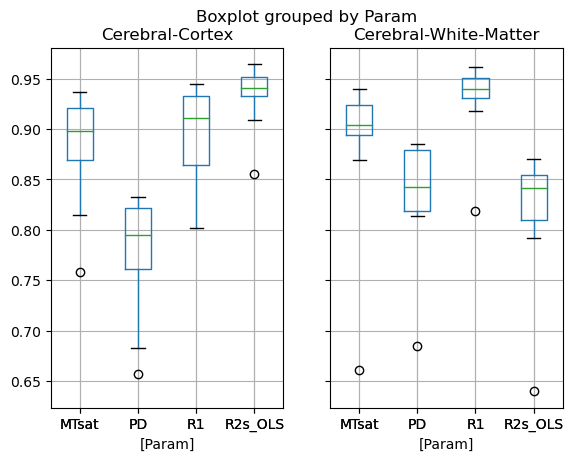

In [64]:
MPM_r_aseg.drop('Sub', axis=1).boxplot(by=['Param'])

## 基于 aparc 分区的结果：脑区对于稳定性的影响
### 相关系数

In [10]:
MPM_r_aparc.head()

,ctx-lh-bankssts,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal,ctx-lh-cuneus,ctx-lh-entorhinal,ctx-lh-fusiform,ctx-lh-inferiorparietal,ctx-lh-inferiortemporal,ctx-lh-isthmuscingulate,ctx-lh-lateraloccipital,...,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula,Sub,Param
0,0.849584,0.888425,0.699483,0.883245,0.667578,0.750393,0.905607,0.566864,0.923562,0.790226,...,0.605811,0.846852,0.808280,0.843404,0.306682,0.531078,0.884180,0.796408,13,MTsat
1,0.951140,0.935060,0.898068,0.979732,0.838380,0.886735,0.925065,0.907339,0.938347,0.935065,...,0.890808,0.903204,0.908143,0.904577,0.458751,0.552042,0.909909,0.936797,11,MTsat
2,0.870629,0.923108,0.829051,0.881772,0.796277,0.791564,0.891585,0.757104,0.929191,0.847039,...,0.798953,0.822351,0.830963,0.766254,0.524560,0.466953,0.891186,0.894060,15,MTsat
3,0.880019,0.940831,0.886422,0.921393,0.815819,0.903738,0.890003,0.867116,0.939010,0.906993,...,0.923331,0.919381,0.928375,0.925191,0.882603,0.794823,0.882211,0.941073,10,MTsat
4,0.846835,0.828349,0.907169,0.795079,0.790090,0.785072,0.810350,0.852355,0.930744,0.781608,...,0.902078,0.877426,0.858772,0.897006,0.639510,0.499249,0.931365,0.894321,12,MTsat


**对S1、S2所有被试在各个脑区上的相关系数取均值**

In [9]:
MPM_r_aparc

Param,MTsat,PD,R1,R2s_OLS
ctx-lh-bankssts,0.839735,0.716829,0.864940,0.675606
ctx-lh-caudalanteriorcingulate,0.920452,0.727533,0.893658,0.754949
ctx-lh-caudalmiddlefrontal,0.852674,0.773234,0.884999,0.654018
ctx-lh-cuneus,0.875690,0.749564,0.804045,0.812663
ctx-lh-entorhinal,0.780764,0.710772,0.632784,0.953738
...,...,...,...,...
ctx-rh-supramarginal,0.856877,0.774334,0.868986,0.809934
ctx-rh-frontalpole,0.656717,0.668573,0.668476,0.815291
ctx-rh-temporalpole,0.604283,0.593752,0.582945,0.794702
ctx-rh-transversetemporal,0.908489,0.715000,0.909722,0.754670


**数据点代表某脑区上所有被试相关系数的均值**

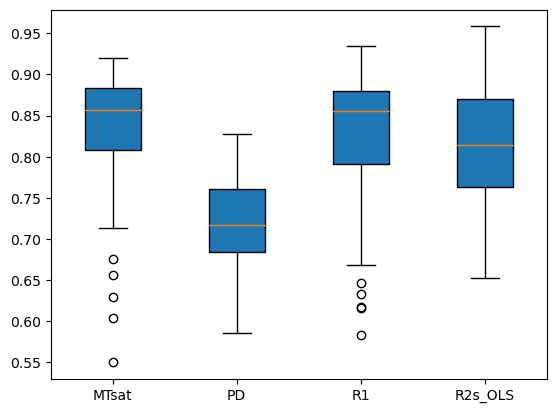

In [6]:
import matplotlib.pyplot as plt

figure,axes=plt.subplots() #得到画板、轴
axes.boxplot(MPM_r_aparc, patch_artist=True) #描点上色
plt.xticks([1,2,3,4], MPM_r_aparc.columns.tolist())
plt.show() #展示

### 变异系数


先前曾在 vertex 水平上完成此计算 可供参考 

<div align="left">
<img src=https://raw.githubusercontent.com/yuan-chengyi/Results/main/COV_on_aparc.png height="500" width="500" />
</div>

## 对于 “ MPM 的 *COV* 分布状态 和 *相关系数* 分布情况矛盾 ” 的推测

先前刻画了 MPM 在灰质、白质中的分布情况（对角线自上而下分别对应参数：MTsat、PD、R1、R2s_OLS，每一簇分布包含了一组被试的数据） <br>
各参数分布的 COV 大小排序大致为 $PD < R1 \approx MTsat < R2s\_OLS$ <br>
那么对于任意两被试同一类组织下的两个 voxel 之间计算 COV 都可能得到类似结果 <br>
这一性质使得试次间 COV 大小不足以作为判断稳定性强弱的依据，即不能得到稳定性 $PD > R1 > MTsat > R2s\_OLS$

<div align="left">
<img src=https://raw.githubusercontent.com/yuan-chengyi/Results/main/MPM_distribution&correlation.png height="500" width="500" />
</div>